## UK Car Accidents Severity Prediction

# Motivation 

There is a lot of impact of traffic accidents on social and economic condition of any country. Traffic Accidents costs around hundreds of billions of pounds every year to the UK citizens. The large losses are basically done by the small number of serious accidents. Hence to control this is always an important challenge for any country. 
There could be two approaches for dealing with traffic safecty problems, firstly lack of pedestrian control facility, bad road conditions and many more reasons plays a vital role in causing any accident. For the effective implementation of this approach, accident prediction and severity prediciton are critical. If we can identify the patterns of how these serious accidents happen and the key factors, we might be able to implement well-informed actions and better allocate financial and human resources.

## Business Objective

The first and foremost objective of this project is to recognize all the relevant factors which plays an important role in causing the serious accidents. After this group project we will individually work on accurately predicting the accident severity for a given accident. This model is supposed to be able to predict the likelihood of this accident being a severe one. The accident could be the one that just happened and still lack of detailed information, or a potential one predicted by other models.We are trying to build a model to predict the accident severity for the National Highway Authority of United Kingdom. So that they can take effective measures to controll the severity of accidents and lower down the number of accidents.

## Dataset Overview
UK-Accident dataset is a countrywide car accident dataset, which contains around 19000 records of with accident severity that took place in 2020.Even though 2020 was a different year where lockdown was taking place due to COVID restrictions but still a lot of accidents happened in 2020. ac
In this project, we are going to study the accident data of 2020 of UK and try to predict the accident severity. We did some exploration analysis to fully understand the data and its relevant features which highly affect the accident severity and modeling so that irrelevant factors can be eliminated to the greatest extent.

## Tabel of content
#### OVERVIEW & PREPROCESSING

    1.1 Importing Libraries

    1.2 Load the data
    
    1.3 Feature Details of Data

    1.4  Dropping Useless Features

    1.5  Mapping the features to their MetaData

#### HANDLING MISSING DATA

    2.1 Train Test Split

    2.2 Sampling

    2.3 Error Comparision B/W Random And Stratified Sampling

    2.4 Missing Values

#### EXPLORATION 

    3.1 Descriptive Statistics of Categorical Variables

    3.2 Descriptive Statistics of Numerical Variables 

   
    
 ####  TRANSFORMATION 

    4.1 Standard Scalin
    4.2 One-hot Encoding
 


## Importing Libraries ##

In [1]:
# Importing the base Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearnex import patch_sklearn
patch_sklearn()
import seaborn as sns  # viz
from IPython.display import HTML, display
pd.set_option("display.max_columns",None)
import plotly.express as px
import os
import urllib
import time

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Extracting the data from the road-accidents-safety-data files available on data.gov.uk website #

Importing url from the website and creating directory  and folder for our dataset so that it can be retrived directly from the folder and calling from there only.

# 1) Load the data

In [2]:
#reteriving website URL into variable
URL = "https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-accident-2020.csv"
#creating function for making directory and folder 
def my_frame():
    global URL
    #if directory doesn't exist then creating
    if not os.path.exists("big_data_assignment"):
        os.makedirs("big_data_assignment")
        #if data doesn't exist in folder then creating one
    if not os.path.exists("big_data_assignment/dft-road-casualty-statistics-accident-2020.csv"):
        #reteriving URL by requesting from web
        urllib.request.urlretrieve(URL, "big_data_assignment/dft-road-casualty-statistics-accident-2020.csv")
        #reading csv file
    return pd.read_csv("big_data_assignment/dft-road-casualty-statistics-accident-2020.csv")

In [3]:
##Validating Accident dataframe

df=my_frame()
df.head()

C:\Users\yogis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020           10219808               521389.0   
1  2020010220496           2020           10220496               529337.0   
2  2020010228005           2020           10228005               526432.0   
3  2020010228006           2020           10228006               538676.0   
4  2020010228011           2020           10228011               529324.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   
2                182761.0  -0.178719  51.529614             1   
3                184371.0  -0.001683  51.541210             1   
4                181286.0  -0.137592  51.515704             1   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  04/02/2020   
1                  3                   1                     2  27/04/2020   
2                  3                   1                     1  01/01/2020   
3                  2                   1                     1  01/01/2020   
4                  3                   1                     2  01/01/2020   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            3  09:00                        10                    E09000032   
1            2  13:55                         9                    E09000022   
2            4  01:25                         1                    E09000033   
3            4  01:50                        17                    E09000025   
4            4  02:25                         1                    E09000033   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000032                 6                  0          6   
1               E09000022                 3               3036          6   
2               E09000033                 5                  0          6   
3               E09000025                 3                 11          6   
4               E09000033                 3                 40          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  0   
1           20                9                 2                  6   
2           30                3                 1                  6   
3           30                0                -1                  0   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  9   
1                   0                                  0   
2                   0                                  0   
3                  -1                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                  

# Dropping some unwanted columns #

In [4]:
#dropping undesired columns which has reference id and dates
accident = df.drop(['accident_index','accident_year','accident_reference',
                    'location_easting_osgr','location_northing_osgr',
              'local_authority_ons_district','local_authority_highway',
                    'first_road_number','second_road_number',
              'lsoa_of_accident_location','junction_control','police_force',
                    'local_authority_district','date','time'], axis=1)

dropping undersirable columns such as reference id, data with id etc

In [5]:
#Validating the accident dataframe
accident.head()

longitude   latitude  accident_severity  number_of_vehicles  \
0  -0.254001  51.462262                  3                   1   
1  -0.139253  51.470327                  3                   1   
2  -0.178719  51.529614                  3                   1   
3  -0.001683  51.541210                  2                   1   
4  -0.137592  51.515704                  3                   1   

   number_of_casualties  day_of_week  first_road_class  road_type  \
0                     1            3                 6          6   
1                     2            2                 3          6   
2                     1            4                 5          6   
3                     1            4                 3          6   
4                     2            4                 3          6   

   speed_limit  junction_detail  second_road_class  \
0           20                0                  0   
1           20                9                  6   
2           30                3                  6   
3           30                0                  0   
4           30                3                  5   

   pedestrian_crossing_human_control  pedestrian_crossing_physical_facilities  \
0                                  9                                        9   
1                                  0                                        4   
2                                  0                                        0   
3                                  0                                        4   
4                                  0                                        0   

   light_conditions  weather_conditions  road_surface_conditions  \
0                 1                   9                        9   
1                 1                   1                        1   
2                 4                   1                        2   
3                 4                   1                        1   
4                 4                   1                        1   

   special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
0                           0                    0                    1   
1                           0                    0                    1   
2                           0                    0                    1   
3                           0                    0                    1   
4                           0                    0                    1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  
0                                            3                2  
1                                            1                2  
2                                            1                2  
3                                            1                2  
4                                            1                2

In [6]:
# Information regarding the accident dataset
#checking type of variables & their missing value status
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   longitude                                    91185 non-null  float64
 1   latitude                                     91185 non-null  float64
 2   accident_severity                            91199 non-null  int64  
 3   number_of_vehicles                           91199 non-null  int64  
 4   number_of_casualties                         91199 non-null  int64  
 5   day_of_week                                  91199 non-null  int64  
 6   first_road_class                             91199 non-null  int64  
 7   road_type                                    91199 non-null  int64  
 8   speed_limit                                  91199 non-null  int64  
 9   junction_detail                              91199 non-null  int64  
 10

Since there are few null values present in longitude & latitude whereas all the datatypes are being shown as integer except longitude & latitude.There are 91199 records with 21 columns.

In [7]:
# Validating the shape of accident data
accident.shape

(91199, 21)

## There are total 91199 rows and 21 columns in accident dataset which we will use for further analysis. ##

In [8]:
# Extracting the 5 records of accident data
accident.head(5)

longitude   latitude  accident_severity  number_of_vehicles  \
0  -0.254001  51.462262                  3                   1   
1  -0.139253  51.470327                  3                   1   
2  -0.178719  51.529614                  3                   1   
3  -0.001683  51.541210                  2                   1   
4  -0.137592  51.515704                  3                   1   

   number_of_casualties  day_of_week  first_road_class  road_type  \
0                     1            3                 6          6   
1                     2            2                 3          6   
2                     1            4                 5          6   
3                     1            4                 3          6   
4                     2            4                 3          6   

   speed_limit  junction_detail  second_road_class  \
0           20                0                  0   
1           20                9                  6   
2           30                3                  6   
3           30                0                  0   
4           30                3                  5   

   pedestrian_crossing_human_control  pedestrian_crossing_physical_facilities  \
0                                  9                                        9   
1                                  0                                        4   
2                                  0                                        0   
3                                  0                                        4   
4                                  0                                        0   

   light_conditions  weather_conditions  road_surface_conditions  \
0                 1                   9                        9   
1                 1                   1                        1   
2                 4                   1                        2   
3                 4                   1                        1   
4                 4                   1                        1   

   special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
0                           0                    0                    1   
1                           0                    0                    1   
2                           0                    0                    1   
3                           0                    0                    1   
4                           0                    0                    1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  
0                                            3                2  
1                                            1                2  
2                                            1                2  
3                                            1                2  
4                                            1                2

## Mapping the variable to their MetaData

The data is presented in numerical form in the excel file, and each numerical value has its own meaning. . A separate meta data file contains the means.We are mapping our data file with their actual names/meaning. To have better understanding for further analyses. ##

In [9]:
# Constructing a function to map all the dictionary values to the columns name and returning into datatframe.
def cat(col,dic,df):
    df[col]=df[col].map(dic)
    return df

# deifining all the dictionaries with their keys and values for mapping

replacement_weather = {1: "Fine no high winds",2: "Raining no high winds",3: "Snowing no high winds",
                       4: "Fine + high winds",5: "Raining + high winds",6: "Snowing + high winds",
                       7: "Fog or mist",8: "Other",9: "Unknown"}  

replacement_day = {1: "Sunday",2: "Monday",3: "Tuesday",4: "Wednesday",5: "Thursday",6: "Friday",7: "Saturday"}
replacement_first_road_class = {1: "Motorway",2: "A(M)",3: "A",4: "B",5: "C",6: "Unclassified"}
replacement_road_type = {1: "Roundabout",2: "One way street",3: "Dual Carriageway",
                         6: "Single Carriageway",7: "Sliproad",9: "Unknown",12: "One way street/slip road",
                         -1: "Data missing or out of range"}
replacement_junc_detail = {0: "Not at junction or within 20 metres",1:"Roundabout",2:"Mini-roundabout",
                           3:"T or staggered junction",5:"Slip road",6:"Crossroads",
                           7:"More than 4 arms (not roundabout)",8:"Private drive or entrance",
                           9:"Other junction",99:"unknown (self reported)",-1:"Data missing or out of range"}
replacement_second_road_class = {0:"Not at junction or within 20 metres",1:"Motorway",2:"A(M)",3:"A",
                                 4:"B",5:"C",6:"Unclassified"}
replacement_ped_crs_phy_fac = {0:"No physical crossing facilities within 50 metres",1:"Zebra",
                               4:"Pelican, puffin, toucan or similar non-junction pedestrian light crossing",
                               5:"Pedestrian phase at traffic signal junction",7:"Footbridge or subway",
                               8:"Central refuge",-1:"Data missing or out of range",9:"unknown (self reported)"}
replacement_light_conditions = {1:"Daylight",4:"Darkness - lights lit",5:"Darkness - lights unlit",
                                6:"Darkness - no lighting",7:"Darkness - lighting unknown",
                                -1:"Data missing or out of range"}
replacement_road_Surf_cond = {1:"Dry",2:"Wet or damp",3:"Snow",4:"Frost or ice",5:"Flood over 3cm. deep",
                              6:"Oil or diesel",7:"Mud",-1:"Data missing or out of range",
                              9:"unknown (self reported)"}
replacement_ped_crs_human_ctrl={0:"None within 50 metres ",1:"Control by school crossing patrol",
                                2:"Control by other authorised person",
                               -1:"Data missing or out of range",9:"unknown (self reported)"}
replacement_sp_cond_at_site={0:"None",1:"Auto traffic signal - out",2:"Auto signal part defective",
                             3:"Road sign or marking defective or obscured",
                            4:"Roadworks",5:"Road surface defective",6:"Oil or diesel",7:"Mud",
                             8:"Data missing or out of range",9:"unknown (self reported)"}

replacement_carriage_hazd={0:"None",1:"",2:"Other object on road",3:"Previous accident",4:"Dog on road",
                           5:"Other animal on road",
                          6:"Pedestrian in carriageway - not injured",
                           7:"Any animal in carriageway (except ridden horse)",
                          -1:"Data missing or out of range",9:"unknown (self reported)"}
replacement_urbn_rural={1:"Urban",2:"Rural",3:"Unallocated",-1:"Data missing or out of range"}
replacement_did_police_attnd={1:"Yes",2:"No",
                              3:"No - accident was reported using a self completion  form (self rep only)",
                             -1:"Data missing or out of range"}
replacement_trunk_road_flag={1:"Trunk (Roads managed by Highways England)",2:"Non-trunk",
                             -1:"Data missing or out of range"}

replacement_accident_severity = {1:"Fatal",2:"Serious",3:"Slight"}





# Creating a varible where all the columns will be stored
x=[replacement_weather,replacement_day,replacement_first_road_class,replacement_road_type,replacement_junc_detail,
   replacement_second_road_class,replacement_ped_crs_phy_fac,replacement_light_conditions,replacement_road_Surf_cond,
  replacement_ped_crs_human_ctrl,replacement_sp_cond_at_site,replacement_carriage_hazd,replacement_urbn_rural,
   replacement_did_police_attnd,replacement_trunk_road_flag,replacement_accident_severity]

# variable for all the dicstionaries so that loop can iterate from the lists of all the dictionarries
# Putting our old data in y variable
y=['weather_conditions','day_of_week','first_road_class','road_type','junction_detail',
   'second_road_class',
   'pedestrian_crossing_physical_facilities','light_conditions','road_surface_conditions',
   'pedestrian_crossing_human_control',
   'special_conditions_at_site','carriageway_hazards','urban_or_rural_area',
   'did_police_officer_attend_scene_of_accident',
   'trunk_road_flag','accident_severity']

#  created a for loop whihc will call function and pass the columns values as well dictionary associated with it ,
# loop will iterate till the number of columns .
for i in range(len(x)):
    accident=cat(y[i],x[i],accident)

In [10]:
# Validating the accident dataframe
accident.head()

longitude   latitude accident_severity  number_of_vehicles  \
0  -0.254001  51.462262            Slight                   1   
1  -0.139253  51.470327            Slight                   1   
2  -0.178719  51.529614            Slight                   1   
3  -0.001683  51.541210           Serious                   1   
4  -0.137592  51.515704            Slight                   1   

   number_of_casualties day_of_week first_road_class           road_type  \
0                     1     Tuesday     Unclassified  Single Carriageway   
1                     2      Monday                A  Single Carriageway   
2                     1   Wednesday                C  Single Carriageway   
3                     1   Wednesday                A  Single Carriageway   
4                     2   Wednesday                A  Single Carriageway   

   speed_limit                      junction_detail  \
0           20  Not at junction or within 20 metres   
1           20                       Other junction   
2           30              T or staggered junction   
3           30  Not at junction or within 20 metres   
4           30              T or staggered junction   

                     second_road_class pedestrian_crossing_human_control  \
0  Not at junction or within 20 metres           unknown (self reported)   
1                         Unclassified            None within 50 metres    
2                         Unclassified            None within 50 metres    
3  Not at junction or within 20 metres            None within 50 metres    
4                                    C            None within 50 metres    

             pedestrian_crossing_physical_facilities       light_conditions  \
0                            unknown (self reported)               Daylight   
1  Pelican, puffin, toucan or similar non-junctio...               Daylight   
2   No physical crossing facilities within 50 metres  Darkness - lights lit   
3  Pelican, puffin, toucan or similar non-junctio...  Darkness - lights lit   
4   No physical crossing facilities within 50 metres  Darkness - lights lit   

   weather_conditions  road_surface_conditions special_conditions_at_site  \
0             Unknown  unknown (self reported)                       None   
1  Fine no high winds                      Dry                       None   
2  Fine no high winds              Wet or damp                       None   
3  Fine no high winds                      Dry                       None   
4  Fine no high winds                      Dry                       None   

  carriageway_hazards urban_or_rural_area  \
0                None               Urban   
1                None               Urban   
2                None               Urban   
3                None               Urban   
4                None               Urban   

         did_police_officer_attend_scene_of_accident trunk_road_flag  
0  No - accident was reported using a self comple...       Non-trunk  
1                                                Yes       Non-trunk  
2                                                Yes       Non-trunk  
3                                                Yes       Non-trunk  
4                                                Yes       Non-trunk



## Random Sampling

 Defining a random sampling function will ensure we have the same split and will get the same result every time we run our program. We want the test set to be 20% and train to be 80% of our data ###


# 2) Train test split

In [11]:
#importing library for splitting data into training & testing part.
from sklearn.model_selection import train_test_split
# defining test size to be 20% and random state to be 7
train_set, test_set = train_test_split(accident, test_size=0.2, random_state=7)
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

72959 train and 18240 test instances


We have splitted 72959 records as training and 18240 as testing 

 Defining a stratified sampling will help to have the same split and the same result every time. We will set test set (20%) and training set(80%) 


## Stratified Sampling

In [12]:
 # since splitting library will remain same but we are adding extra attribute "stratify" 
# whihc will stratify on the basis of target variable
strat_train_set, strat_test_set = train_test_split(accident, test_size=0.2, random_state=7,
                                                  stratify=accident["accident_severity"])
print(f"{strat_train_set.shape[0]} train and {strat_test_set.shape[0]} test instances")

72959 train and 18240 test instances


In [13]:
# creating a function to check the percentage of stratified splitting
def get_data(data):
    
    return round(100*(data["accident_severity"].value_counts()/len(data)),2)

proportion=pd.DataFrame({
    "Overall_ratio":get_data(accident),
    "Train_set":get_data(strat_train_set),
    "Test_set":get_data(strat_test_set)
})
proportion.head()

Overall_ratio  Train_set  Test_set
Slight           78.35      78.35     78.35
Serious          20.13      20.13     20.13
Fatal             1.53       1.53      1.52

We can see that we have equally distributed data into three categories in training as well as testing data

<AxesSubplot:>

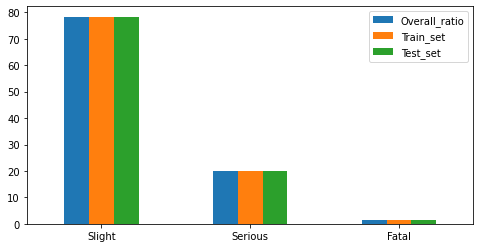

In [14]:
#plotting the distribution of categories to ensure same distribution
proportion.plot(kind="bar",figsize=(8,4),rot=0)

As we can see equal distribution of data in training as well as testing but fatal category has very low records whihc we will sort with some method further

## Error Comparision B/W Random And Stratified Sampling

### We need to compare the result of sampling and which type of sampling will be useful for our analyzing. ###

In [15]:
# function for comparing random and stratifed value percentage
def accident_severity(data):
    return data["accident_severity"].value_counts() / len(data)

# creating a random split
rand_train_set, rand_test_set = train_test_split(accident, test_size=0.2, random_state=7)

# creating a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": accident_severity(accident),
    "Random test set": accident_severity(rand_train_set),
    "Stratified test set": accident_severity(strat_train_set),
}).sort_index()

# add two more columns for the differnece percentage in random sampling and stratifed sampling
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

df_tmp

Overall  Random test set  Stratified test set  Rand. %error  \
Fatal    0.015252         0.015474             0.015255      1.456065   
Serious  0.201263         0.200811             0.201264     -0.224461   
Slight   0.783484         0.783714             0.783481      0.029314   

         Strat. %error  
Fatal         0.018247  
Serious       0.000274  
Slight       -0.000426

Stratified sampling has similar result as overall classification.Error is also low over random sampling.
So we have decided to proceed with stratified sampling for analysis

#### Changing Train and Test dataset Name

In [16]:
train_set = strat_train_set
test_set = strat_test_set

In [17]:
# obseriving any duplicacy in data
train_set.duplicated()

30628    False
55068    False
37441    False
41290    False
65421    False
         ...  
10102    False
24239    False
61       False
26389    False
60812    False
Length: 72959, dtype: bool

Seems like data has no duplicate values intially.

##  3)Exploratory Data Analysis

<AxesSubplot:>

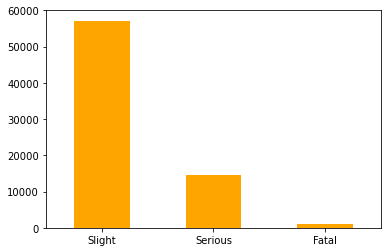

In [18]:
# visualsing the target varible (accident severity) with the help of barplot
train_set['accident_severity'].value_counts().plot(kind='bar',rot=0,color="orange")

From the above, we can observe that during accident, the slight severity is highest. There are few serious accident cases and very less fatal accient severity. Need to perform OVERSAMPLING ahead for serious and fatal class so that testing data result can assess all the the classes equally.

In [19]:
#Information of the train set
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72959 entries, 30628 to 60812
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   longitude                                    72950 non-null  float64
 1   latitude                                     72950 non-null  float64
 2   accident_severity                            72959 non-null  object 
 3   number_of_vehicles                           72959 non-null  int64  
 4   number_of_casualties                         72959 non-null  int64  
 5   day_of_week                                  72959 non-null  object 
 6   first_road_class                             72959 non-null  object 
 7   road_type                                    72959 non-null  object 
 8   speed_limit                                  72959 non-null  int64  
 9   junction_detail                              72959 non-null  object 

#### Missing Values for Continous And Categorical Variable Variables

In [20]:
# Number of missing value in the data
train_set.isnull().sum().sort_values(ascending=False)

special_conditions_at_site                     163
second_road_class                               81
latitude                                         9
longitude                                        9
weather_conditions                               1
number_of_casualties                             0
light_conditions                                 0
did_police_officer_attend_scene_of_accident      0
urban_or_rural_area                              0
carriageway_hazards                              0
accident_severity                                0
road_surface_conditions                          0
pedestrian_crossing_physical_facilities          0
day_of_week                                      0
pedestrian_crossing_human_control                0
number_of_vehicles                               0
junction_detail                                  0
speed_limit                                      0
road_type                                        0
first_road_class               

special condition has most 163 missing values followed by longitude & latitude , prefer to drop these rows

In [21]:
# The shape of the data
print(f"new shape of training data is:{train_set.shape}, and for testing :{test_set.shape}")

new shape of training data is:(72959, 21), and for testing :(18240, 21)


#### Handling Missing values mentioned as -1 for eategorical Variable and Missing values as null for Continous Variable-For Train Data & Testing data

In [22]:
#extracting dataframe without rows which has "-1" values in columns
for col in train_set.columns:
    train_set = (train_set[train_set[col]!=-1])
    #dropping all the null values from columns
    train_set.dropna(inplace=True)
# same measures for test data
for col in test_set.columns:
    test_set = (test_set[test_set[col]!=-1])
    test_set.dropna(inplace=True)

In [23]:
# Checking for null values
train_set.isnull().sum()

longitude                                      0
latitude                                       0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
first_road_class                               0
road_type                                      0
speed_limit                                    0
junction_detail                                0
second_road_class                              0
pedestrian_crossing_human_control              0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             0
road_surface_conditions                        0
special_conditions_at_site                     0
carriageway_hazards                            0
urban_or_rural_area                            0
did_police_officer_attend_scene_of_accident    0
trunk_road_flag     

In [24]:
# Checking for any null value in test
test_set.isnull().sum()

longitude                                      0
latitude                                       0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
day_of_week                                    0
first_road_class                               0
road_type                                      0
speed_limit                                    0
junction_detail                                0
second_road_class                              0
pedestrian_crossing_human_control              0
pedestrian_crossing_physical_facilities        0
light_conditions                               0
weather_conditions                             0
road_surface_conditions                        0
special_conditions_at_site                     0
carriageway_hazards                            0
urban_or_rural_area                            0
did_police_officer_attend_scene_of_accident    0
trunk_road_flag     

All the null values and rows corresponding -1 values been removed from the data

## Descriptive Statistics

We will look into the variables in our dataframe in this section. We're looking at numeric independent variables and category independent variables separately. Because a subset of these variables will be employed in the predictive model, descriptive statistics are crucial for better understanding them. For each of the numerical variables, histograms and box plots are provided to highlight their skewness and to see any outliers.These outliers will be addressed later in the project.To show the value counts for each of the categorical variables, bar charts are provided.We donot want to undertake any "data snooping" because it will lead to model development bias. As a result, the rand train set dataframe is used for the analysis in this section. ###

#### Descriptive Statistics for Continous Variable ##

# Helper Function

In [25]:
#### make display look nice ####
def blk(block_title: str) -> None:
    """
    Print a nice section title
    """
    blk = "=" * 7
    print(f"\n{blk} {block_title} {blk}")


def display_tables(df_list: list) -> None:
    """
    Display tables in the cell horizontally.
    Take up all the space before going to the next row.
    """
    html = ''
    for accident in df_list:
        html_df = accident.to_html().replace(
            '<table ', '<table style="float: left; margin-right: 20px" '
        )
        html += html_df

    return HTML(html)


### Data Manipulation and Organizers
def dicts_key_contain(x: dict, lookup: list) -> dict:
    """
    Returns dictionary that contains specific strings

    Args:
    x: the target dictionary
    lookup: list of string required in the keys

    Returns:
    A filtered dictionary
    """
    # incase lookup is a string
    lookup = [lookup] if isinstance(lookup, str) else lookup
    result = {}

    for k, v in x.items():
        for t in lookup:
            if t in k:
                result[k] = v
                break
    return result


### utility matrices
def search_matrix(m: int, n: int = None) -> np.array:
    """
    Args:
    m: Number of rows (and Number of cols if n is None)
    (optional)
    n: Number of cols

    Returns:
    if (m * m), returns a upper triangle = 1 and diagonal = 0 matrix
    if (m * n), returns a (m * n) = 1
    """
    if not n:
        search_mat = np.triu(np.ones((m, m)))
        # search matrix would ignore S{i}{j} if i == j
        np.fill_diagonal(search_mat, 0)
    else:
        search_mat = np.ones((m, n))

    return search_mat


def comb_matrix(a: list, b: list, *args) -> np.array:
    """
    Generate logical combinations

    Args:
    a: list of choice of logic a
    b: list of choice of logic b
    *arg: same format as a, b, ...

    Returns:
    The combination matrix
    """
    res = []
    for i in a:
        for j in b:
            res.append(np.append(i, j))
    res = np.array(res)

    # check if there are more logic to carry on
    if args:
        args = list(args)
        return comb_matrix(res, args.pop(0), *args)
    return res

In [26]:
## define helper function
def group_var_types(accident: pd.DataFrame, check: bool = False) -> dict:
    """
    Return a dictionary with the likely appropriate variable types

    Args:
    accident: DataFrame
    check:
        True -> sugguest the appropriate one;
        False -> assign instead of suggest

    Returns:
    dict that assign whether it is bool, category, or numerical
        if check=True, potential wrong variable types are marked
        with '?{var_types}'
        '**{var_types}' are unknown types
    """
    choice = defaultdict(list)  # a dict[List] that don't need key check
    prefix = '?' if check else ''  # use to prefix the keys
    k = '**'  # unknown type

    ### potential vars check rules ###
    # possbily using 0, 1, ... as categorical values
    _encoded_cat = lambda x: x.min() in [-1,0,1] 
    
    # more than 10% of the data repeatly using the same value
    _large_pct = lambda x: x.value_counts().iloc[0] >= len(x) * 0.1

    ### loop through the columns
    for name, item in accident.iteritems():
        datatype = item.dtypes
        
        # check ambigious int that could be categorical
        if ((datatype == np.int64) | (datatype == int)) & ((name != 'number_of_casualties') 
                                                           & (name != 'number_of_vehicles')):
            if _encoded_cat(item) or _large_pct(item):
                k = f'{prefix}category'
            else:
                k = f'{prefix}float64'

        # check if object is true object or bool
        elif datatype == object:
            if isinstance(item[1], bool):
                k = f'{prefix}bool'
            else:
                k = f'{prefix}category'
        

        else:
            k = str(datatype)            
        
        if ((name == 'number_of_casualties') | (name == 'number_of_vehicles')):
            k = f'{prefix}int'
        

        choice[k].append(name)

    return dict(choice)


# check the variables type
blk("Variables Types Info")
vars_type = group_var_types(train_set, check=True)
display(vars_type)


======= Variables Types Info =======


{'float64': ['longitude', 'latitude'],
 '?category': ['accident_severity',
  'day_of_week',
  'first_road_class',
  'road_type',
  'speed_limit',
  'junction_detail',
  'second_road_class',
  'pedestrian_crossing_human_control',
  'pedestrian_crossing_physical_facilities',
  'light_conditions',
  'weather_conditions',
  'road_surface_conditions',
  'special_conditions_at_site',
  'carriageway_hazards',
  'urban_or_rural_area',
  'did_police_officer_attend_scene_of_accident',
  'trunk_road_flag'],
 '?int': ['number_of_vehicles', 'number_of_casualties']}

In [27]:
# retrieve column names group wrt to variable types
dtype_gp = group_var_types(train_set, check=False)

num_cols_float = dtype_gp['float64']
num_cols_int = dtype_gp['int']
category_cols = dtype_gp['category']

# descripive stats of numerical
display(rand_train_set[num_cols_float].describe())
display(rand_train_set[num_cols_int].describe())


longitude      latitude
count  72948.000000  72948.000000
mean      -1.188938     52.348777
std        1.368125      1.326866
min       -7.497375     49.970479
25%       -2.112957     51.456575
50%       -1.040172     51.756748
75%       -0.125677     53.299931
max        1.756257     60.541144

number_of_vehicles  number_of_casualties
count        72959.000000          72959.000000
mean             1.834990              1.267301
std              0.677705              0.685934
min              1.000000              1.000000
25%              1.000000              1.000000
50%              2.000000              1.000000
75%              2.000000              1.000000
max             13.000000             41.000000

The mean of longitude is -1.188, standard deviation is 1.36, minimumvalue is -7.49737. Similarly, the latitude mean is 52.34877, standard deviation is 1.326866. For number of vehicles, The mean of  is 1.834990, standard deviation is 1.267301. The minimum value is 1 which is similar for number of casualities, but its mean is 1.267301 and standard deviation is 0.6859. 

## Descriptive Statistics for Categorical Variable

In [28]:
def count_table(
    accident: pd.DataFrame, cols: list, desc_of_interest: dict, suffix=''
) -> list:
    """
    Print out the unique values tables with respect to given columns

    Args:
    accident: DataFrame
    cols: break out columns
    desc_of_interest: dictionary of statistics required
    """

    # print out the descriptive data for categorical data
    cat_groups = []  # store groupby df
    for col in cols:
        if ((col != 'date') & (col != 'time') & (col != 'police_force') & (col != 'local_authority_district')):
            gp = accident.groupby(col).agg(desc_of_interest)  # groupby and find results
            gp.columns = ['count']  # provide more informative names

        # find the percentage (row value / column sum)
            gp['percentage'] = gp['count'] / gp['count'].sum() * 100
            gp.index.name += f'{suffix}'
            cat_groups.append(gp)
    return cat_groups


# extract the unique values counts and %
table_general = count_table(train_set, category_cols, {'accident_severity': 'count'})
display_tables(table_general)

We can see stastics of all the categoical columns at the same place by creating dataframe for each columns .
We have shown count of every category in a columns as well as their percentage in that particular columns.


In [29]:
# displaying all the categorical columns graph witht the help of function
#we are showing graphs because there are many columns which were unable to fit in frame
def catgraph(columns):
    fig, ax = plt.subplots(1, len(columns), figsize=(15, 5))
    for i, categorical_feature in enumerate(train_set[columns]):
        train_set[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
      

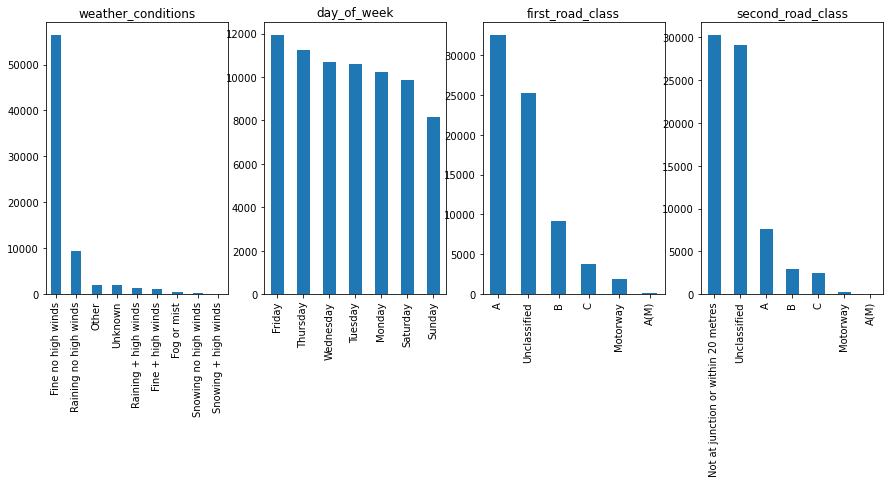

In [30]:
#passing few columns to the function and displaying graph
categorical_features1 = ['weather_conditions','day_of_week','first_road_class','second_road_class']
catgraph(categorical_features1)  

above bar graphs represents that all the columns have one exteme category over others which might influence accuracy score on test data . Moreover First_road_class and second_road_class conveys same meaning which we need to delete in delete one in cleaning part

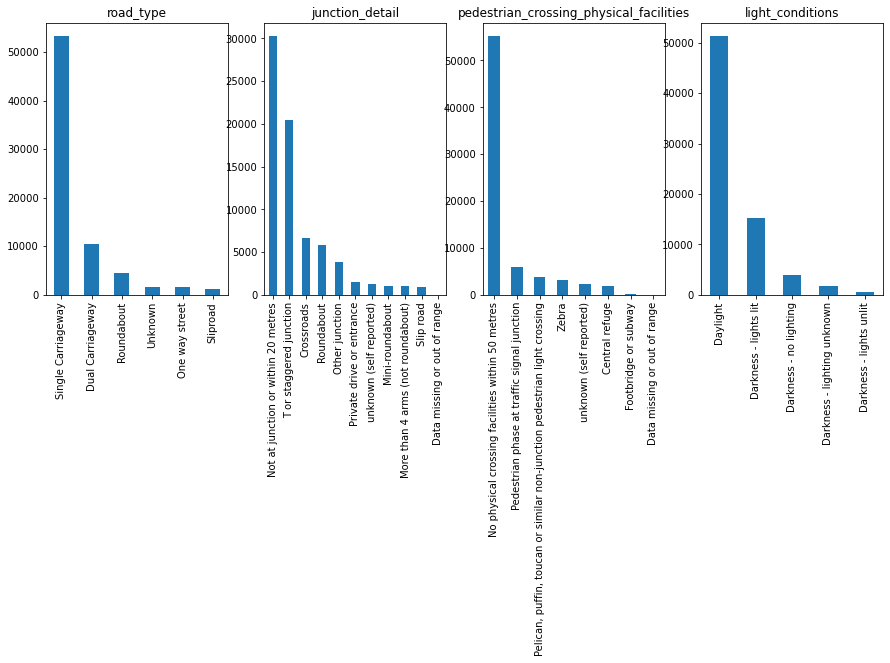

In [31]:
# displaying other columns as well from same function
categorical_features2 = ['road_type','junction_detail','pedestrian_crossing_physical_facilities','light_conditions']
catgraph(categorical_features2)  

From the above graphs we can see there are few columns whihc have cetegories such as "data missing or out of range ","Other","Unknown" which we need to drop from the respective column to avoid any anomalies

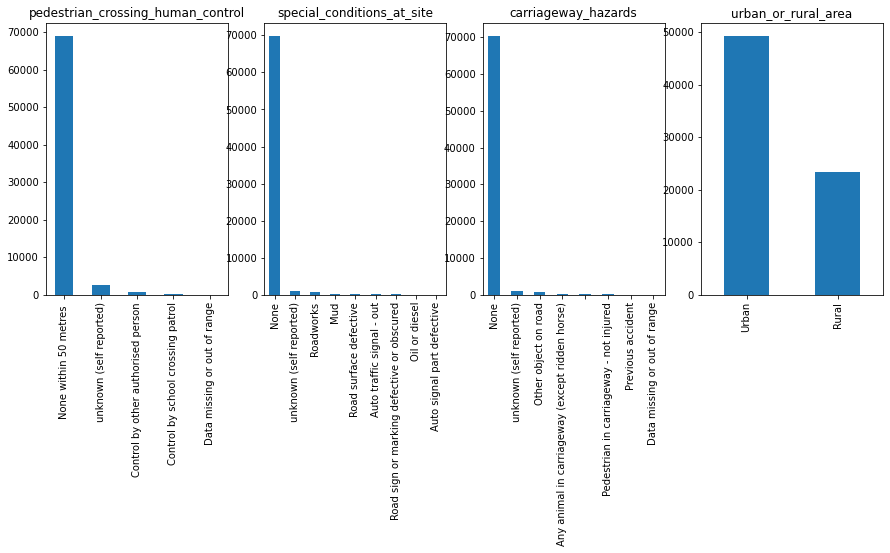

In [32]:

categorical_feature3=['pedestrian_crossing_human_control',
   'special_conditions_at_site','carriageway_hazards','urban_or_rural_area']
catgraph(categorical_feature3)

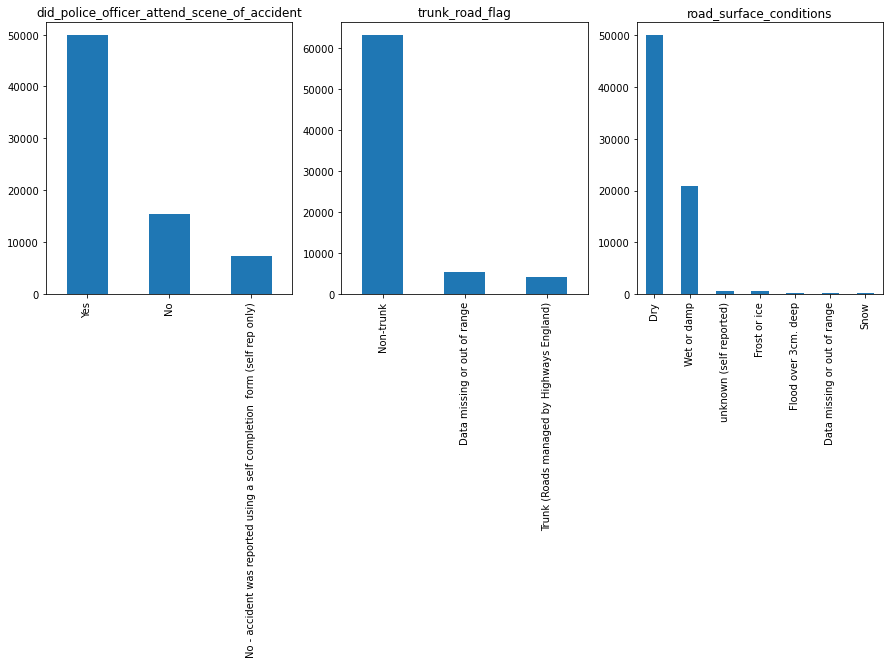

In [33]:
# passing remaing categorical columns to the function and generating graphs
categorical_feature4=['did_police_officer_attend_scene_of_accident','trunk_road_flag','road_surface_conditions']
catgraph(categorical_feature4)

Above graphs shows there are few columns where data is missing or out of range  category can be seen we need to delete this category.

In [34]:
# created a function and passing  dataframe such as train set & test set
# along with column name and categories which we need to delete.
def unknown(df,col_name,z):
    x=df[df[col_name]==z].index
    return df.drop(x)
# list for all the categorical columns
x=["junction_detail","pedestrian_crossing_physical_facilities","pedestrian_crossing_human_control",
   "carriageway_hazards","road_surface_conditions","trunk_road_flag","road_type"]
#list for all the unnecessary category
y=["Unknown","Data missing or out of range","Other"]
#nested loop for columns and categories
for i in range(len(x)):
    for j in range(len(y)):
        train_set=unknown(train_set,x[i],y[j])
        test_set=unknown(test_set,x[i],y[j])
     

In [35]:
#using plotly library for enhanced visualisation
df = px.data.tips()
#observing any outlier in number of casuality column
fig = px.box(train_set["number_of_casualties"],y="number_of_casualties")
fig.show()


From the above graph we can see there is extreme value in number of casualty which we need to remove

In [36]:
# see the values count from larges value to smallest value
blk("Check the counts of large value")
display(train_set['number_of_casualties'].value_counts().sort_index(ascending=False))


# df comparison to see if >= 25 implies bankruptcy or other information
Casualities = train_set['number_of_casualties'] >= 25
display(train_set[Casualities])


# removing rows that are >= 25
train_set = train_set[~Casualities]


======= Check the counts of large value =======


41        1
17        1
11        3
10        3
9         5
8        13
7        35
6        78
5       250
4       799
3      2316
2      8806
1     53297
Name: number_of_casualties, dtype: int64

longitude   latitude accident_severity  number_of_vehicles  \
66993  -1.314431  51.085841           Serious                   1   

       number_of_casualties day_of_week first_road_class           road_type  \
66993                    41    Thursday     Unclassified  Single Carriageway   

       speed_limit                      junction_detail  \
66993           30  Not at junction or within 20 metres   

                         second_road_class pedestrian_crossing_human_control  \
66993  Not at junction or within 20 metres            None within 50 metres    

                pedestrian_crossing_physical_facilities light_conditions  \
66993  No physical crossing facilities within 50 metres         Daylight   

       weather_conditions road_surface_conditions special_conditions_at_site  \
66993  Fine no high winds                     Dry                       None   

      carriageway_hazards urban_or_rural_area  \
66993                None               Rural   

      did_police_officer_attend_scene_of_accident trunk_road_flag  
66993                                         Yes       Non-trunk

### Number of vehicles distribution

C:\Users\yogis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Min: 1 
Max: 13 
Median: 2.0


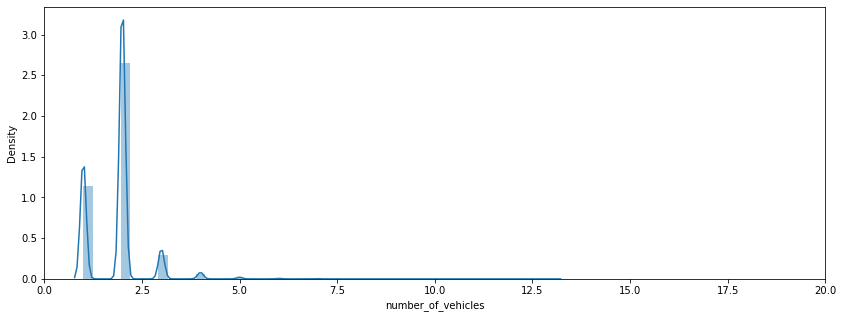

In [37]:
#####  Plotting the graph, for minimum,maximum and median of number of vehicles ###
plt.figure(figsize=(14,5))
sns.distplot(train_set.number_of_vehicles).set_xlim(0,20)
print('Min:',    train_set.number_of_vehicles.min(), '\n'
      'Max:',    train_set.number_of_vehicles.max(), '\n'
      'Median:', train_set.number_of_vehicles.median())

from the above density graph we can see number of vehicles are clustered in the range of 0 to 3 whereas its right skewed

C:\Users\yogis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Min: 1 
Max: 17 
Median: 1.0


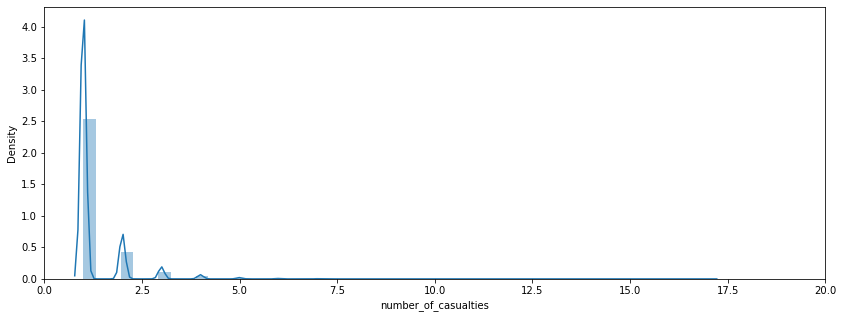

In [38]:
# Minimum, maximum and median for number of casualities
plt.figure(figsize=(14,5))
sns.distplot(train_set.number_of_casualties).set_xlim(0,20)
print('Min:',    train_set.number_of_casualties.min(), '\n'
      'Max:',    train_set.number_of_casualties.max(), '\n'
      'Median:', train_set.number_of_casualties.median())

most of casualities are within 0 to 3 range whereas there are huge values which are around 1

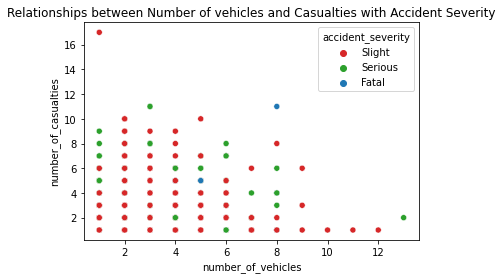

In [39]:
# Plotting scattered plot between number of vehicles and casualities with accident severity
fig = sns.scatterplot(data=train_set, x='number_of_vehicles', y='number_of_casualties',hue='accident_severity',
                      palette=['tab:red', 'tab:green','tab:blue'])
fig.title.set_text('Relationships between Number of vehicles and Casualties with Accident Severity')

 The scatter plot between number of vehicles and number of casualities and we can see the different colours for different type of accident severity - red for slight, green for serious, blue for fatal. We can interpret that most of the fatal severity happened when number of vehicles were 8 and 5 

#### Distribution of Continous Variable

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'number_of_vehicles'}>,
        <AxesSubplot:title={'center':'number_of_casualties'}>],
       [<AxesSubplot:title={'center':'speed_limit'}>, <AxesSubplot:>]],
      dtype=object)

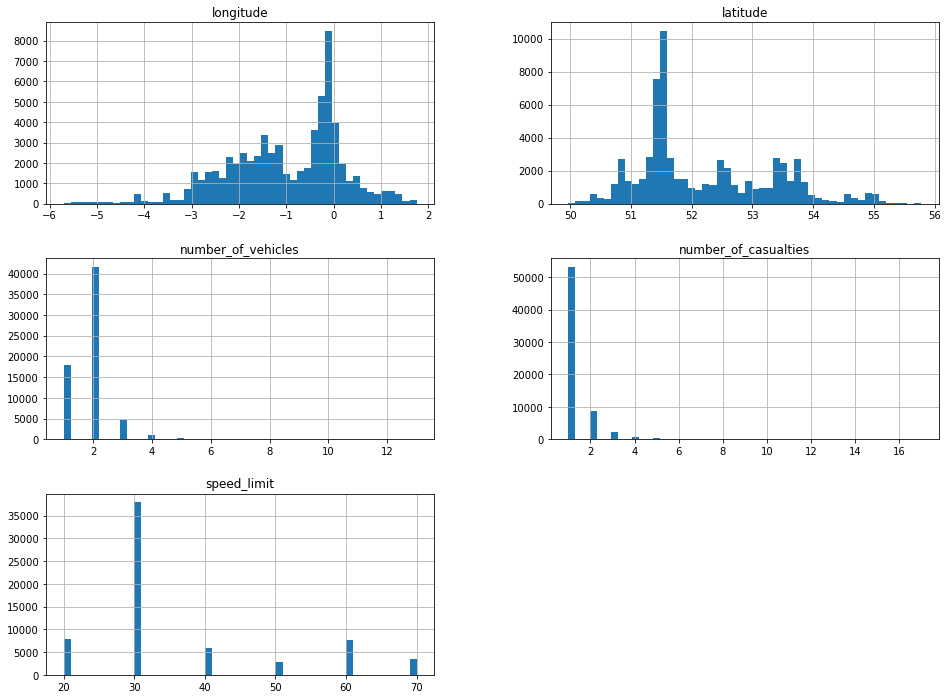

In [40]:
# Histogram for longitude, latitude, number of vehicles, number of casualities and speed limit
train_set.hist(column=['longitude', 'latitude', 'number_of_vehicles', 'number_of_casualties','speed_limit'],bins=50,figsize=(16,12))

Longitude is left skewed and whereas latitude is right skewed 

In [41]:
train_set['accident_severity'].value_counts()

Slight     51761
Serious    12901
Fatal        944
Name: accident_severity, dtype: int64

 There are total number of slight accident severity of about 51826, serious accident severity of about 12909, fatal is about 945. ###

### Contengency graphs for all the categorical columns on the basis of target variable

#### We have used red color for fatal, yellow for serious and green for slight severity to undestand better

<AxesSubplot:xlabel='first_road_class'>

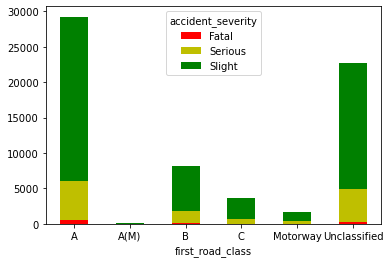

In [42]:
#crosstab graph for first road class with respect to target variable
cont_table1 = pd.crosstab(train_set['first_road_class'], train_set['accident_severity'])

cont_table1
cont_table1.plot(kind="bar", stacked=True, rot=0,color='r''y''g')

We will observe that the highest value of number of accidents is for first_road_class 'A', followed by 'Unclassified', then B and C and Motorway and A(M) has lowest number of accidents.

<AxesSubplot:ylabel='road_type'>

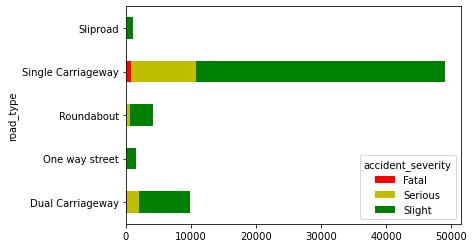

In [43]:
# road type & accident severity
cont_table2 = pd.crosstab(train_set['road_type'], train_set['accident_severity'])

cont_table2
cont_table2.plot.barh(stacked=True,color='r''y''g')

<AxesSubplot:ylabel='junction_detail'>

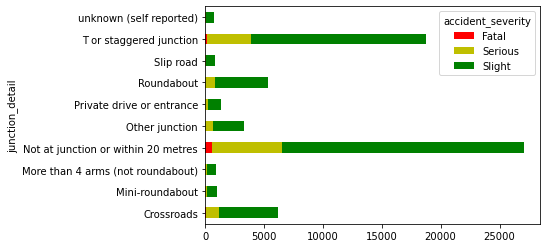

In [44]:
# junction detail & accident severity
cont_table3 = pd.crosstab(train_set['junction_detail'], train_set['accident_severity'])

cont_table3
cont_table3.plot.barh(stacked=True,color='r''y''g')

<AxesSubplot:ylabel='pedestrian_crossing_human_control'>

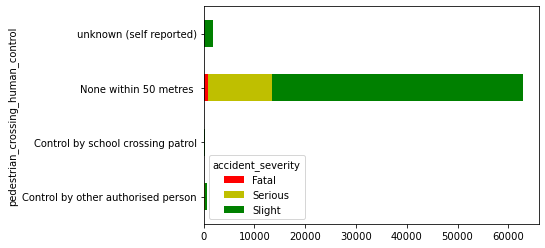

In [45]:
#pedestrian crossing human control and accident severity
cont_table4 = pd.crosstab(train_set['pedestrian_crossing_human_control'], train_set['accident_severity'])

cont_table4
cont_table4.plot.barh(stacked=True,color='r''y''g')

<AxesSubplot:ylabel='pedestrian_crossing_physical_facilities'>

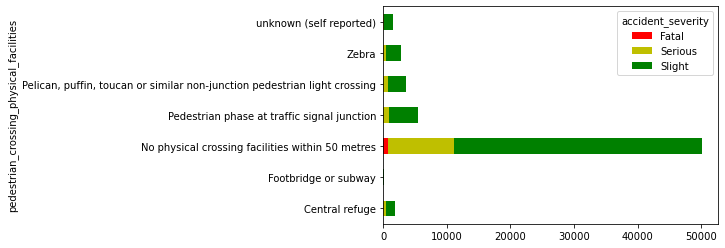

In [46]:
# pedestrian_crossing_physical_facilities & accident severity
cont_table5 = pd.crosstab(train_set['pedestrian_crossing_physical_facilities'], 
                          train_set['accident_severity'])

cont_table5
cont_table5.plot.barh(stacked=True,color='r''y''g')

<AxesSubplot:ylabel='light_conditions'>

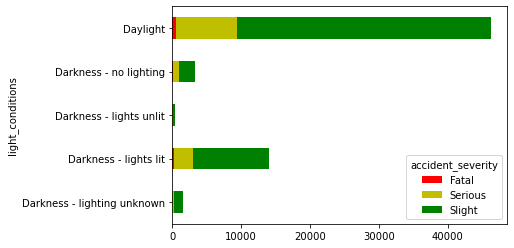

In [47]:
# light_conditions & accident_severity
cont_table6 = pd.crosstab(train_set['light_conditions'], train_set['accident_severity'])

cont_table6
cont_table6.plot.barh(stacked=True,color='r''y''g')

<AxesSubplot:xlabel='day_of_week'>

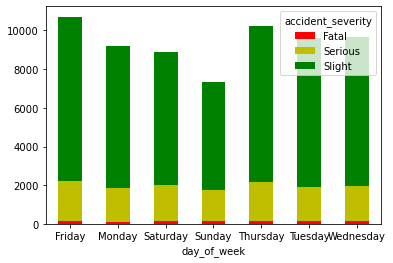

In [48]:
# day_of_week & accident severity
cont_table7 = pd.crosstab(train_set['day_of_week'], train_set['accident_severity'])

cont_table7
cont_table7.plot(kind="bar", stacked=True, rot=0,color='r''y''g')

<AxesSubplot:ylabel='weather_conditions'>

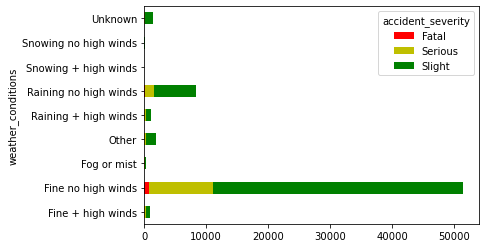

In [49]:
# weather_conditions & accident severity
cont_table8 = pd.crosstab(train_set['weather_conditions'], train_set['accident_severity'])

cont_table8
cont_table8.plot.barh(stacked=True,color='r''y''g')

Text(0.5, 1.0, 'Accident Severity vs speed_limit')

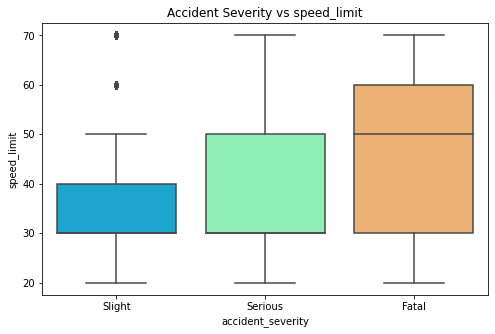

In [50]:
# plotting side by side bloxplot for accident severity ans speed limit
plt.figure(figsize=(8,5))
sns.boxplot(x='accident_severity',y='speed_limit',data=train_set, palette='rainbow')
plt.title("Accident Severity vs speed_limit")

we can see  data as anomaly on slight cateogory whereas mean of fatal is more compared to other categories.This graph shows that if speed limit increases severity of accident increases. Its slight if speed is low.

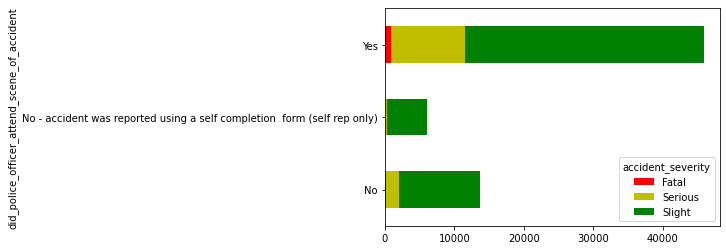

In [51]:
# did_police_officer_attend_scene_of_accident & accident severity
cont_table9 = pd.crosstab(train_set['did_police_officer_attend_scene_of_accident'], 
                          train_set['accident_severity'])

cont_table9
ax=cont_table9.plot.barh(stacked=True,color='r''y''g')

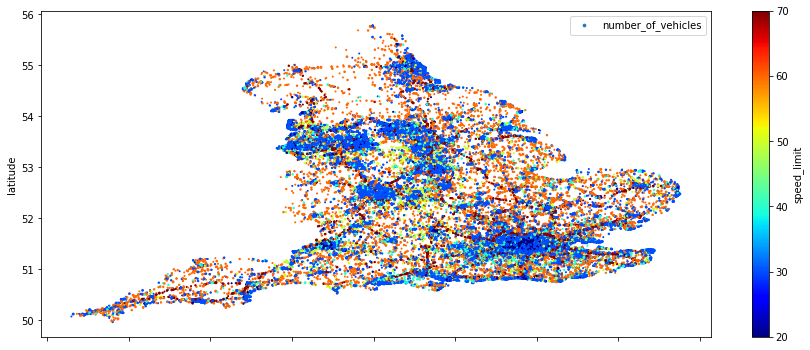

In [52]:
# ploting a graph whihc could show us speed limit on the areas and number of vehicles
train_set.plot(kind="scatter",x="longitude",y="latitude",alpha=1,s=train_set["number_of_vehicles"],
               label="number_of_vehicles",
              c="speed_limit",cmap=plt.get_cmap("jet"),colorbar=True,figsize=(15,6))
plt.legend()

we can see speed limit is normal in centre areas whereas on the border its high which shows that no supervision on the border side of locations also number of vehicles are more in the middles might be city or main areas.

<AxesSubplot:ylabel='trunk_road_flag'>

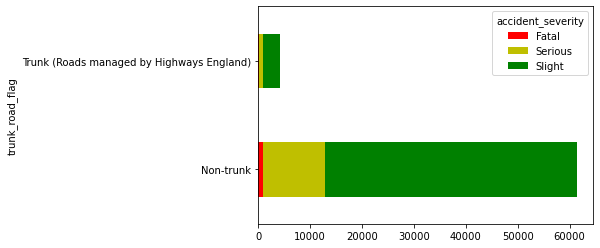

In [53]:
# trunk_road_flag & accident severity
cont_table10 = pd.crosstab(train_set['trunk_road_flag'], train_set['accident_severity'])

cont_table10
cont_table10.plot.barh(stacked=True,color='r''y''g')

<AxesSubplot:xlabel='first_road_class'>

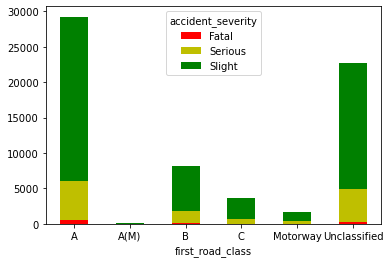

In [54]:
# first_road_class & accident_severity
cont_table11 = pd.crosstab(train_set['first_road_class'], train_set['accident_severity'])

cont_table11
cont_table11.plot(kind="bar", stacked=True, rot=0,color='r''y''g')

<AxesSubplot:xlabel='urban_or_rural_area'>

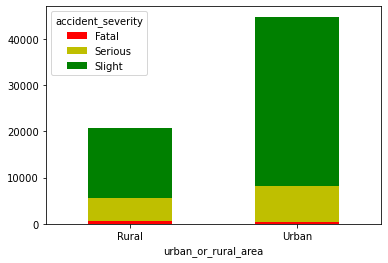

In [55]:
# urban_or_rural_area & accident_severity
cont_table12 = pd.crosstab(train_set['urban_or_rural_area'], train_set['accident_severity'])

cont_table12
cont_table12.plot(kind="bar", stacked=True, rot=0,color='r''y''g')

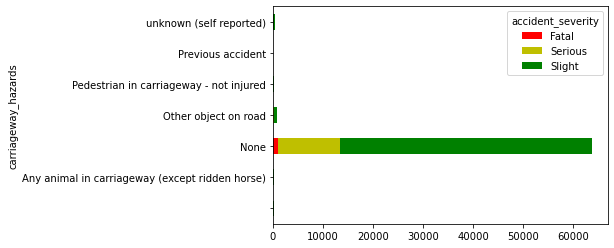

In [56]:
# carriageway_hazards & accident_severity
cont_table13 = pd.crosstab(train_set['carriageway_hazards'], train_set['accident_severity'])

cont_table13
ax=cont_table13.plot.barh(stacked=True,color='r''y''g')

Most of the values are none in carriageway_hazards so will drop this column

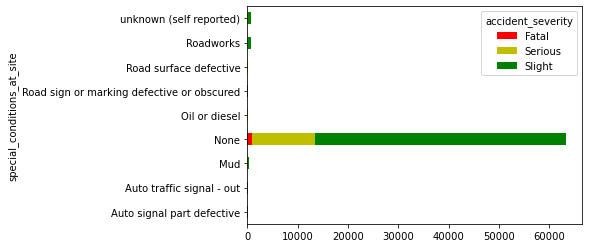

In [57]:
# special_conditions_at_site & accident_severity
cont_table14 = pd.crosstab(train_set['special_conditions_at_site'], train_set['accident_severity'])

cont_table14
ax=cont_table14.plot.barh(stacked=True,color='r''y''g')

In [58]:
# Calculating percentage of categories in special special_conditions_at_site
round(100*train_set["special_conditions_at_site"].value_counts()/len(train_set),2)

None                                          96.52
Roadworks                                      1.23
unknown (self reported)                        1.06
Mud                                            0.35
Auto traffic signal - out                      0.24
Road surface defective                         0.24
Road sign or marking defective or obscured     0.16
Oil or diesel                                  0.16
Auto signal part defective                     0.05
Name: special_conditions_at_site, dtype: float64

from the above result we can see 96% of special_conditions_at_site is None we can drop this column from our dataset.

# 4)Data cleaning and Transformation

We will be dropping the carriage hazardway, special condition at site  from the training and then from the test data since there are lot of None values present in these colums

In [59]:
# droping special_conditions_at_site","carriageway_hazards columns from training dataset
train_set=train_set.drop(labels=["special_conditions_at_site","carriageway_hazards"], axis=1)
# droping special_conditions_at_site","carriageway_hazards columns from testing dataset
test_set=test_set.drop(labels=["special_conditions_at_site","carriageway_hazards"], axis=1)

In [60]:
# droping second road class columns from training dataset as it has same meaning as first road class
train_set.drop(columns="second_road_class",inplace=True)
test_set.drop(columns="second_road_class",inplace=True)

## SCALING

In [61]:
# importing standard scaler function 
from sklearn.preprocessing import StandardScaler
# crearing object of standard scaler
scaler = StandardScaler()
# we are scaling only few columns except target variable and dummy variables.
col_names=['longitude','latitude','number_of_vehicles','number_of_casualties','speed_limit']
features=train_set[col_names]
# fitting training set columns
scaler=StandardScaler().fit(features.values)
# transforming those values and storing into feature variable
features=scaler.transform(features.values)
# passing transformed values back to dataset
train_set[col_names]=features


In [62]:
train_set.head()

longitude  latitude accident_severity  number_of_vehicles  \
30628  -0.450211  2.585797            Slight            0.226076   
55068   1.731058  0.282439            Slight            0.226076   
37441  -0.278252  1.125669            Slight            1.697788   
41290  -0.719027  0.192249           Serious            0.226076   
65421  -0.125606 -1.108035            Slight           -1.245637   

       number_of_casualties day_of_week first_road_class           road_type  \
30628              1.090620   Wednesday                A            Sliproad   
55068              1.090620    Saturday     Unclassified  Single Carriageway   
37441             -0.401056   Wednesday     Unclassified  Single Carriageway   
41290             -0.401056      Monday     Unclassified  Single Carriageway   
65421              1.090620    Thursday                B  Single Carriageway   

       speed_limit                      junction_detail  \
30628     2.463687  Not at junction or within 20 metres   
55068     1.736604              T or staggered junction   
37441    -0.444644  Not at junction or within 20 metres   
41290    -0.444644            Private drive or entrance   
65421     1.736604              T or staggered junction   

      pedestrian_crossing_human_control  \
30628            None within 50 metres    
55068            None within 50 metres    
37441            None within 50 metres    
41290            None within 50 metres    
65421            None within 50 metres    

                pedestrian_crossing_physical_facilities  \
30628  No physical crossing facilities within 50 metres   
55068  No physical crossing facilities within 50 metres   
37441  No physical crossing facilities within 50 metres   
41290  No physical crossing facilities within 50 metres   
65421  No physical crossing facilities within 50 metres   

             light_conditions  weather_conditions road_surface_conditions  \
30628                Daylight  Fine no high winds                     Dry   
55068                Daylight  Fine no high winds             Wet or damp   
37441                Daylight  Fine no high winds                     Dry   
41290                Daylight  Fine no high winds                     Dry   
65421  Darkness - no lighting  Fine no high winds                     Dry   

      urban_or_rural_area did_police_officer_attend_scene_of_accident  \
30628               Rural                                          No   
55068               Rural                                          No   
37441               Urban                                          No   
41290               Urban                                         Yes   
65421               Rural                                         Yes   

                                 trunk_road_flag  
30628  Trunk (Roads managed by Highways England)  
55068                                  Non-trunk  
37441                                  Non-trunk  
41290                                  Non-trunk  
65421                                  Non-trunk

we can see longitude, latitude, number of vehicles and number of casualities have been scaled .

In [63]:
# Tranforing testing data as well 
features=test_set[col_names]
features=scaler.transform(features.values)
test_set[col_names]=features

## Dummy variables creation

In [64]:
# storing categorical columns into a list
columns1=["first_road_class","road_type","junction_detail","pedestrian_crossing_physical_facilities",
        "light_conditions","weather_conditions","road_surface_conditions","day_of_week"]
# importing library
from sklearn.preprocessing import OneHotEncoder
#passing attribute first to avoid multicollineaity which will remove first value
one_hot_encoder= OneHotEncoder(drop="first",sparse=False)

# one hot encoder only accepts two d array so we are reshaping values in 2d array
for col in columns1:
    cat_vals=train_set[col].values.reshape(-1,1)
    cat_vals = col+ "_" +cat_vals
    # fitting the values and transforming simulataneously
    transformed=one_hot_encoder.fit_transform(cat_vals)
    # storing converted dummies into list
    col_names=one_hot_encoder.categories_[0].tolist()[1:]
    # passing back those converted dummies into corresponding columns
    for i, col_name in enumerate(col_names):
            train_set[col_name]=transformed[:,i]
            
    # applying same procedure for testing data excepting fitting       
    cat=test_set[col].values.reshape(-1,1)
    cat = col+ "_" +cat
    transformed=one_hot_encoder.transform(cat)
    for i, col_name in enumerate(col_names):
            test_set[col_name]=transformed[:,i]

In [65]:
# now dropping original columns because we have created dummies we no longer need.
cols_to_drop = ["day_of_week", "first_road_class", "road_type", "junction_detail",
                "pedestrian_crossing_physical_facilities",
               "light_conditions","weather_conditions","road_surface_conditions",
                "pedestrian_crossing_human_control","urban_or_rural_area",
               "did_police_officer_attend_scene_of_accident","trunk_road_flag"]
# dropping in training data
train_set.drop(columns=cols_to_drop, inplace=True)
#dropping in testing data as well
test_set.drop(columns=cols_to_drop, inplace=True)

In [66]:
train_set.head()

longitude  latitude accident_severity  number_of_vehicles  \
30628  -0.450211  2.585797            Slight            0.226076   
55068   1.731058  0.282439            Slight            0.226076   
37441  -0.278252  1.125669            Slight            1.697788   
41290  -0.719027  0.192249           Serious            0.226076   
65421  -0.125606 -1.108035            Slight           -1.245637   

       number_of_casualties  speed_limit  first_road_class_A(M)  \
30628              1.090620     2.463687                    0.0   
55068              1.090620     1.736604                    0.0   
37441             -0.401056    -0.444644                    0.0   
41290             -0.401056    -0.444644                    0.0   
65421              1.090620     1.736604                    0.0   

       first_road_class_B  first_road_class_C  first_road_class_Motorway  \
30628                 0.0                 0.0                        0.0   
55068                 0.0                 0.0                        0.0   
37441                 0.0                 0.0                        0.0   
41290                 0.0                 0.0                        0.0   
65421                 1.0                 0.0                        0.0   

       first_road_class_Unclassified  road_type_One way street  \
30628                            0.0                       0.0   
55068                            1.0                       0.0   
37441                            1.0                       0.0   
41290                            1.0                       0.0   
65421                            0.0                       0.0   

       road_type_Roundabout  road_type_Single Carriageway  road_type_Sliproad  \
30628                   0.0                           0.0                 1.0   
55068                   0.0                           1.0                 0.0   
37441                   0.0                           1.0                 0.0   
41290                   0.0                           1.0                 0.0   
65421                   0.0                           1.0                 0.0   

       junction_detail_Mini-roundabout  \
30628                              0.0   
55068                              0.0   
37441                              0.0   
41290                              0.0   
65421                              0.0   

       junction_detail_More than 4 arms (not roundabout)  \
30628                                                0.0   
55068                                                0.0   
37441                                                0.0   
41290                                                0.0   
65421                                                0.0   

       junction_detail_Not at junction or within 20 metres  \
30628                                                1.0     
55068                                                0.0     
37441                                                1.0     
41290                                                0.0     
65421                                                0.0     

       junction_detail_Other junction  \
30628                             0.0   
55068                             0.0   
37441                             0.0   
41290                             0.0   
65421                             0.0   

       junction_detail_Private drive or entrance  junction_detail_Roundabout  \
30628                                        0.0                         0.0   
55068                                        0.0                         0.0   
37441                                        0.0                         0.0   
41290                                        1.0                         0.0   
65421                                        0.0                         0.0   

       junction_detail_Slip road  junction_detail_T or staggered junction  \
30628                        0.0                              

As we can see dummies have been created for categorical columns without impacting other columns and target variable and required scaling has been performed now data is ready for furter analysis